In [1]:
import uproot
import numpy as np
import sys

sys.path.insert(0, '..')
from superEvent import superEvent

In [2]:
import matplotlib.pyplot as plt

In [8]:
file1 = uproot.open('../merged_tree_Hannahchanges_20230615.root')
tree1 = file1['event_tree']
branches1 = tree1.arrays()

In [25]:
#In a sample consisting of 2 particles per event, this takes me about 100 seconds (10 events per second) on my macbook
diffs = []
for ev in range(1001):
    if(ev%100 == 0):
        print(ev)
    testev = superEvent(ev, branches1)
    diffs += testev.diffs

0
100
200
300
400
500
600
700
800
900
1000


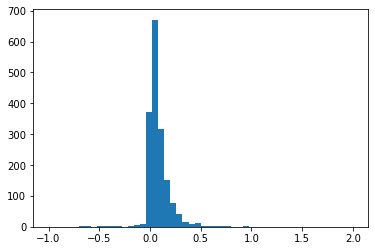

In [10]:
test = plt.hist(diffs, bins = 50, range=[-1,2])

38.03566100161947 -43.537318409570126 -53.14752116328707 397.4390348658607


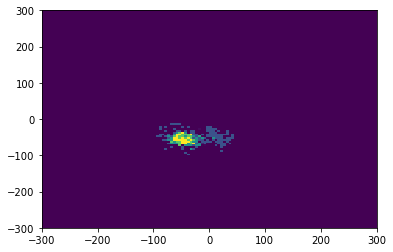

22.876600115397416 5.9147903830154815 -44.289463547276384 372.33547591985445


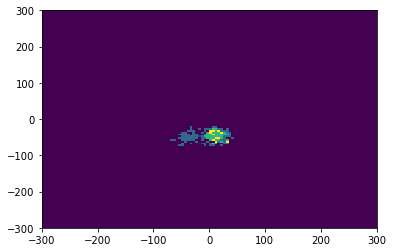

In [23]:
"""
Visualize two clusters.  In this instance, I know that event 60 has two nearby clusters
This is a bit of an illustration of why I might want to add in cluster pruning
to get rid of the "ghost" cluster components underneath the other clusters
In any case, you can compare the energy and position information with the next cell
and see that the reco clusters *are* pretty similar to the truth ones
"""
testev = superEvent(60, branches1)
c=0
print(testev.multiDepthClusters[c].energy,
      testev.multiDepthClusters[c].posx,
      testev.multiDepthClusters[c].posy,
      testev.multiDepthClusters[c].posz)
test2 = plt.hist2d(list(testev.tower_LFHCAL_posx[testev.multiDepthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[testev.multiDepthClusters[c].hitIndices]),
                   weights=list(testev.multiDepthClusters[c].hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])
plt.show()
c=1
print(testev.multiDepthClusters[c].energy,
      testev.multiDepthClusters[c].posx,
      testev.multiDepthClusters[c].posy,
      testev.multiDepthClusters[c].posz)
test3 = plt.hist2d(list(testev.tower_LFHCAL_posx[testev.multiDepthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[testev.multiDepthClusters[c].hitIndices]),
                   weights=list(testev.multiDepthClusters[c].hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])

37.84757009916939 -46.965807239102816 -53.362704596027946 397.954259381409


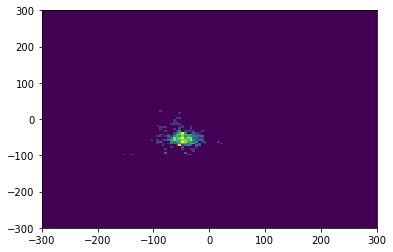

24.399628811283037 9.19245514443251 -44.05701187607595 375.90185858142365


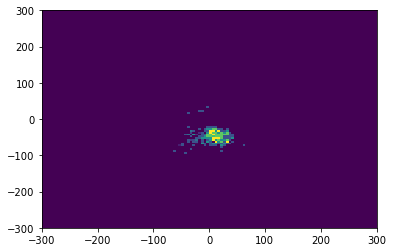

In [22]:
c=0
print(testev.truthClusters[c].energy,
      testev.truthClusters[c].posx,
      testev.truthClusters[c].posy,
      testev.truthClusters[c].posz)
test2 = plt.hist2d(list(testev.tower_LFHCAL_posx[testev.truthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[testev.truthClusters[c].hitIndices]),
                   weights=list(testev.truthClusters[c].hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])
plt.show()
c=1
print(testev.truthClusters[c].energy,
      testev.truthClusters[c].posx,
      testev.truthClusters[c].posy,
      testev.truthClusters[c].posz)
test3 = plt.hist2d(list(testev.tower_LFHCAL_posx[testev.truthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[testev.truthClusters[c].hitIndices]),
                   weights=list(testev.truthClusters[c].hitFracs),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])

38.03566100161947 -43.537318409570126 -53.14752116328707 397.4390348658607


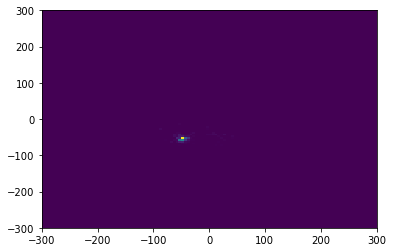

22.876600115397416 5.9147903830154815 -44.289463547276384 372.33547591985445


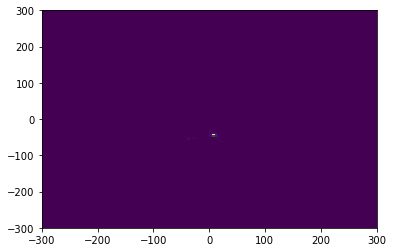

In [27]:
"""
It is often worth doing an energy-weighting when visualizing clusters
"""
testev = superEvent(60, branches1)
c=0
print(testev.multiDepthClusters[c].energy,
      testev.multiDepthClusters[c].posx,
      testev.multiDepthClusters[c].posy,
      testev.multiDepthClusters[c].posz)
test2 = plt.hist2d(list(testev.tower_LFHCAL_posx[testev.multiDepthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[testev.multiDepthClusters[c].hitIndices]),
                   weights=list(np.multiply(testev.multiDepthClusters[c].hitFracs, testev.tower_LFHCAL_E[testev.multiDepthClusters[c].hitIndices])),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])
plt.show()
c=1
print(testev.multiDepthClusters[c].energy,
      testev.multiDepthClusters[c].posx,
      testev.multiDepthClusters[c].posy,
      testev.multiDepthClusters[c].posz)
test3 = plt.hist2d(list(testev.tower_LFHCAL_posx[testev.multiDepthClusters[c].hitIndices]),
                   list(testev.tower_LFHCAL_posy[testev.multiDepthClusters[c].hitIndices]),
                   weights=list(np.multiply(testev.multiDepthClusters[c].hitFracs, testev.tower_LFHCAL_E[testev.multiDepthClusters[c].hitIndices])),
                   bins=[120,120], range=[[-300, 300], [-300, 300]])